In [2]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [3]:
output_path = "/data/projects/PSB/Output/Acceptor"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [4]:
chr_list = list(range(1, 23)) + ['X', 'Y']

In [5]:
chr_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 'X',
 'Y']

In [6]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [24]:
df_dict = {}
df_list = []
for chr_name in chr_list:
    print(chr_name)
    base_dir = "/data/projects/PSB/DNABERT_data/Acceptor/chr"+str(chr_name)
    concat_probab = np.load(base_dir+"/Prediction_result/pred_results.npy")
    print(len(concat_probab))
    df = pd.read_csv(base_dir+"/all_data_new.tsv", sep= "\t")
    print(df.shape)
    Reference_probab = concat_probab[::2]
    Alternative_probab = concat_probab[1::2]
    df['Ref_probab']=Reference_probab
    df['Alt_probab']=Alternative_probab
    df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
    df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)
    df_list.append(df)

1
13309582
(6654791, 13)
2
12415698
(6207849, 13)
3
10857034
(5428517, 13)
4
6551396
(3275698, 13)
5
7503942
(3751971, 13)
6
8062936
(4031468, 13)
7
8254716
(4127358, 13)
8
7457820
(3728910, 13)
9
6386078
(3193039, 13)
10
6643034
(3321517, 13)
11
10259622
(5129811, 13)
12
9010052
(4505026, 13)
13
2798910
(1399455, 13)
14
6153240
(3076620, 13)
15
6346668
(3173334, 13)
16
9070184
(4535092, 13)
17
10326052
(5163026, 13)
18
3008808
(1504404, 13)
19
9997732
(4998866, 13)
20
4138740
(2069370, 13)
21
2197260
(1098630, 13)
22
3763448
(1881724, 13)
X
3815738
(1907869, 13)
Y
39196
(19598, 13)


In [36]:
concatenated_df = pd.concat(df_list)

In [37]:
concatenated_df.shape

(84183943, 17)

In [38]:
concatenated_df.head()

,index,chr,strand,Acceptor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,0,chr1,-,24401417-24401496,24401079-24410779,rs767109914,24401420,24401421,T,C,TGTTTGATGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,TGTCTGATGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,ENST00000475760,0.000076,0.000054,-1.689720e-09,0.494655
1,1,chr1,-,24401417-24401496,24401079-24410779,rs1557461252,24401421,24401421,.,CCACTCCTCAGGTATAGACCCATGAAATACATAAATATGTGTCCCA...,TGTTTGATGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,TGTTCCACTCCTCAGGTATAGACCCATGAAATACATAAATATGTGT...,ENST00000475760,0.000076,0.000001,-5.732076e-09,6.024013
2,2,chr1,-,24401417-24401496,24401079-24410779,rs1643224572,24401424,24401425,T,C,TGTTTGATGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,TGTTTGACGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,ENST00000475760,0.000076,0.000089,1.128651e-09,-0.221882
3,3,chr1,-,24401417-24401496,24401079-24410779,rs1402144573,24401427,24401428,A,G,TGTTTGATGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,TGTTTGATGAGAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,ENST00000475760,0.000076,0.000142,9.266856e-09,-0.893175
4,4,chr1,-,24401417-24401496,24401079-24410779,rs1643224756,24401433,24401434,C,G,TGTTTGATGAAAAGTTCTACTGCATGTTCTCCTAAGCACCTGAAAC...,TGTTTGATGAAAAGTTGTACTGCATGTTCTCCTAAGCACCTGAAAC...,ENST00000475760,0.000076,0.000047,-2.221295e-09,0.693347


In [39]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
filtered_df1 = concatenated_df[(concatenated_df['Ref_probab'] > 0.5) & (concatenated_df['Alt_probab'] < 0.5)]
filtered_df2 = concatenated_df[(concatenated_df['Ref_probab'] < 0.5) & (concatenated_df['Alt_probab'] > 0.5)]
df_interest = pd.concat([filtered_df1, filtered_df2])
df_interest

,index,chr,strand,Acceptor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
2185,2185,chr1,+,24445144-24445223,24415803-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000003912,0.999804,0.001602,-0.998007,21.603005
2215,2215,chr1,+,24445144-24445223,24415814-24466310,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000339255,0.999804,0.001602,-0.998007,21.603005
2245,2245,chr1,+,24445144-24445223,24415813-24454824,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000358028,0.999804,0.001602,-0.998007,21.603005
2275,2275,chr1,+,24445144-24445223,24415802-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000374399,0.999804,0.001602,-0.998007,21.603005
2791,2791,chr1,+,24458847-24458926,24415803-24472976,rs752041946,24458882,24458883,T,A,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTTGAAGGTTTTT...,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTAGAAGGTTTTT...,ENST00000003912,0.999993,0.321426,-0.678561,18.123810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,86838,chrY,+,3109777-3109856,3002946-3120600,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000655607,0.063167,0.963243,0.866991,-8.602347
18674,86840,chrY,+,3109777-3109856,3003001-3110315,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000653660,0.063167,0.963243,0.866991,-8.602347
18676,86842,chrY,+,3109777-3109856,3002901-3120619,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000691894,0.063167,0.963243,0.866991,-8.602347
18678,86844,chrY,+,3109777-3109856,3002894-3200509,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000651090,0.063167,0.963243,0.866991,-8.602347


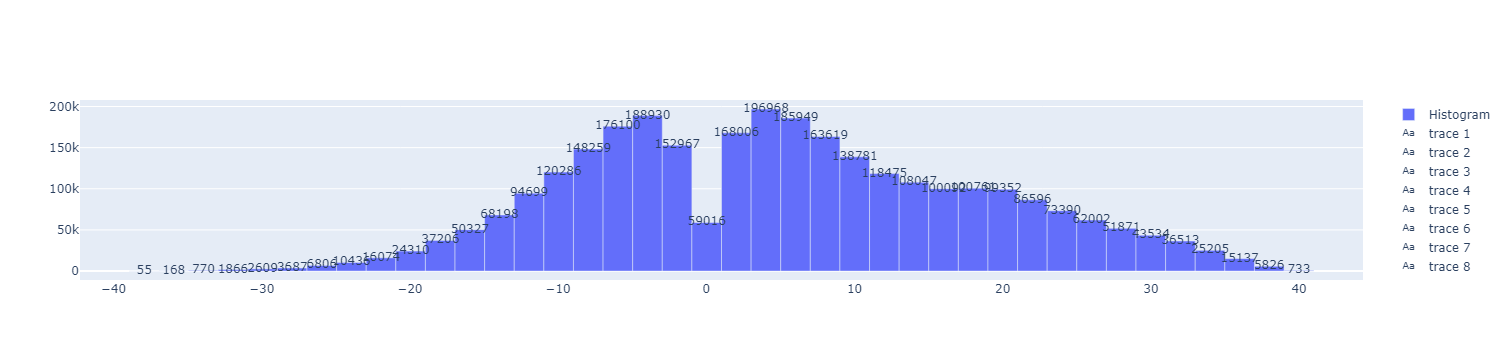

In [40]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

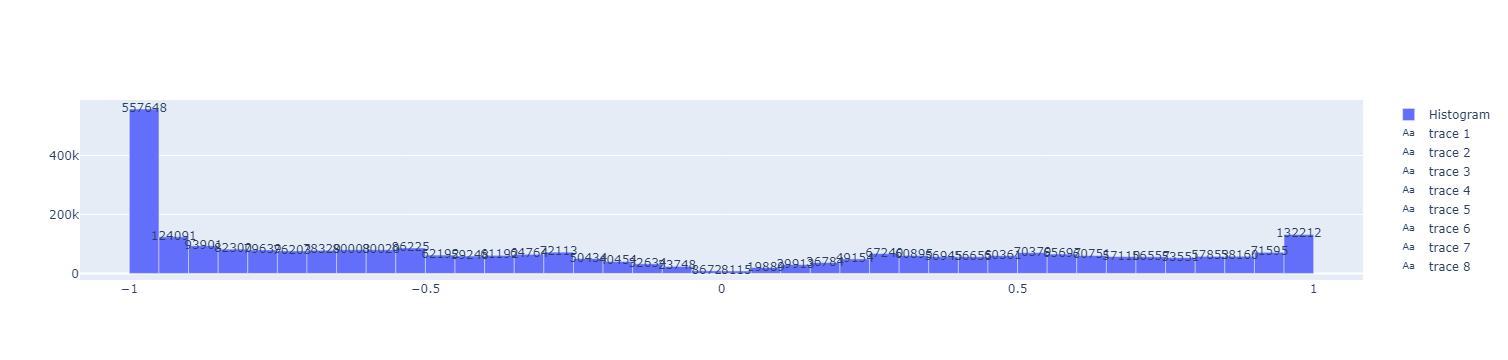

In [41]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [42]:
df_interest = df_interest[(df_interest['ScoreChange']>0.25)|(df_interest['ScoreChange']<-0.25)]
df_interest

,index,chr,strand,Acceptor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
2185,2185,chr1,+,24445144-24445223,24415803-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000003912,0.999804,0.001602,-0.998007,21.603005
2215,2215,chr1,+,24445144-24445223,24415814-24466310,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000339255,0.999804,0.001602,-0.998007,21.603005
2245,2245,chr1,+,24445144-24445223,24415813-24454824,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000358028,0.999804,0.001602,-0.998007,21.603005
2275,2275,chr1,+,24445144-24445223,24415802-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000374399,0.999804,0.001602,-0.998007,21.603005
2791,2791,chr1,+,24458847-24458926,24415803-24472976,rs752041946,24458882,24458883,T,A,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTTGAAGGTTTTT...,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTAGAAGGTTTTT...,ENST00000003912,0.999993,0.321426,-0.678561,18.123810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,86838,chrY,+,3109777-3109856,3002946-3120600,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000655607,0.063167,0.963243,0.866991,-8.602347
18674,86840,chrY,+,3109777-3109856,3003001-3110315,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000653660,0.063167,0.963243,0.866991,-8.602347
18676,86842,chrY,+,3109777-3109856,3002901-3120619,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000691894,0.063167,0.963243,0.866991,-8.602347
18678,86844,chrY,+,3109777-3109856,3002894-3200509,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000651090,0.063167,0.963243,0.866991,-8.602347


In [43]:
#df_interest['Z_Score'] = stats.zscore(df['LogOddRatio'])
df_interest['variant_length'] = df_interest['variant_end']-df_interest['varinat_start']
df_interest

,index,chr,strand,Acceptor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,variant_length
2185,2185,chr1,+,24445144-24445223,24415803-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000003912,0.999804,0.001602,-0.998007,21.603005,2
2215,2215,chr1,+,24445144-24445223,24415814-24466310,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000339255,0.999804,0.001602,-0.998007,21.603005,2
2245,2245,chr1,+,24445144-24445223,24415813-24454824,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000358028,0.999804,0.001602,-0.998007,21.603005,2
2275,2275,chr1,+,24445144-24445223,24415802-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000374399,0.999804,0.001602,-0.998007,21.603005,2
2791,2791,chr1,+,24458847-24458926,24415803-24472976,rs752041946,24458882,24458883,T,A,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTTGAAGGTTTTT...,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTAGAAGGTTTTT...,ENST00000003912,0.999993,0.321426,-0.678561,18.123810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,86838,chrY,+,3109777-3109856,3002946-3120600,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000655607,0.063167,0.963243,0.866991,-8.602347,1
18674,86840,chrY,+,3109777-3109856,3003001-3110315,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000653660,0.063167,0.963243,0.866991,-8.602347,1
18676,86842,chrY,+,3109777-3109856,3002901-3120619,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000691894,0.063167,0.963243,0.866991,-8.602347,1
18678,86844,chrY,+,3109777-3109856,3002894-3200509,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000651090,0.063167,0.963243,0.866991,-8.602347,1


In [44]:
df_interest = df_interest[df_interest['variant_length']<=3]
df_interest

,index,chr,strand,Acceptor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,variant_length
2185,2185,chr1,+,24445144-24445223,24415803-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000003912,0.999804,0.001602,-0.998007,21.603005,2
2215,2215,chr1,+,24445144-24445223,24415814-24466310,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000339255,0.999804,0.001602,-0.998007,21.603005,2
2245,2245,chr1,+,24445144-24445223,24415813-24454824,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000358028,0.999804,0.001602,-0.998007,21.603005,2
2275,2275,chr1,+,24445144-24445223,24415802-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000374399,0.999804,0.001602,-0.998007,21.603005,2
2791,2791,chr1,+,24458847-24458926,24415803-24472976,rs752041946,24458882,24458883,T,A,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTTGAAGGTTTTT...,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTAGAAGGTTTTT...,ENST00000003912,0.999993,0.321426,-0.678561,18.123810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,86838,chrY,+,3109777-3109856,3002946-3120600,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000655607,0.063167,0.963243,0.866991,-8.602347,1
18674,86840,chrY,+,3109777-3109856,3003001-3110315,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000653660,0.063167,0.963243,0.866991,-8.602347,1
18676,86842,chrY,+,3109777-3109856,3002901-3120619,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000691894,0.063167,0.963243,0.866991,-8.602347,1
18678,86844,chrY,+,3109777-3109856,3002894-3200509,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000651090,0.063167,0.963243,0.866991,-8.602347,1


In [45]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

2.5512946294542354 12.090316101491183


In [46]:
#z_score, p_value = ztest(x1= df_interest['LogOddRatio'], value = mean)

-3.3219280948873626 3.3219280948873626


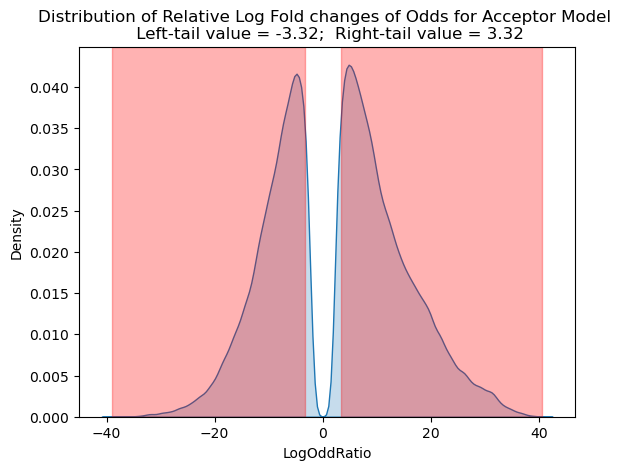

In [47]:
#print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


# print(z_critical)
#x1, x2 = mean + 3*std, mean - 3*std
x1= 3.3219280948873626
x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')

plt.title(f'Distribution of Relative Log Fold changes of Odds for Acceptor Model \n Left-tail value = {x2:.2f};  Right-tail value = {x1:.2f}')
plt.savefig('Acceptor_LogOddRatio_Distribution.png')
plt.show()

In [48]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)]

In [49]:
df_selected

,index,chr,strand,Acceptor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,variant_length
2185,2185,chr1,+,24445144-24445223,24415803-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000003912,0.999804,0.001602,-0.998007,21.603005,2
2215,2215,chr1,+,24445144-24445223,24415814-24466310,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000339255,0.999804,0.001602,-0.998007,21.603005,2
2245,2245,chr1,+,24445144-24445223,24415813-24454824,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000358028,0.999804,0.001602,-0.998007,21.603005,2
2275,2275,chr1,+,24445144-24445223,24415802-24472976,rs1450817635,24445172,24445174,TT,T,AGCAGCCTCAATTCCCTTTTCTTTGTGCTTCATTTTTCAGCTAGTG...,AGCAGCCTCAATTCCCTTTTCTTTGTGCTCATTTTTCAGCTAGTGC...,ENST00000374399,0.999804,0.001602,-0.998007,21.603005,2
2791,2791,chr1,+,24458847-24458926,24415803-24472976,rs752041946,24458882,24458883,T,A,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTTGAAGGTTTTT...,GTCTCCACAGCCCACTGACTGGAGTGCTTTTGTGTAGAAGGTTTTT...,ENST00000003912,0.999993,0.321426,-0.678561,18.123810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,86838,chrY,+,3109777-3109856,3002946-3120600,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000655607,0.063167,0.963243,0.866991,-8.602347,1
18674,86840,chrY,+,3109777-3109856,3003001-3110315,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000653660,0.063167,0.963243,0.866991,-8.602347,1
18676,86842,chrY,+,3109777-3109856,3002901-3120619,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000691894,0.063167,0.963243,0.866991,-8.602347,1
18678,86844,chrY,+,3109777-3109856,3002894-3200509,rs2051480392,3109832,3109833,T,G,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,cagtactaaaaaaacaaaaatcacatgattatctccacagatgcag...,ENST00000651090,0.063167,0.963243,0.866991,-8.602347,1


In [50]:
len(df_selected['dbsnp_id'].unique())

214370

In [51]:
len(df_selected['Acceptor_coordinates'].unique())

61197

In [52]:
df_selected.to_csv(output_path+"/Acceptor_candidates.tsv", sep= "\t", index=False)
# Save to a .tsv file
np.savetxt(output_path+"/Unique_DBSNP_0.05_Percentile.tsv", df_selected['dbsnp_id'].unique(), delimiter="\t", fmt='%s')
np.savetxt(output_path+"/Unique_Acceptors.tsv", df_selected['Acceptor_coordinates'].unique(), delimiter="\t", fmt='%s')

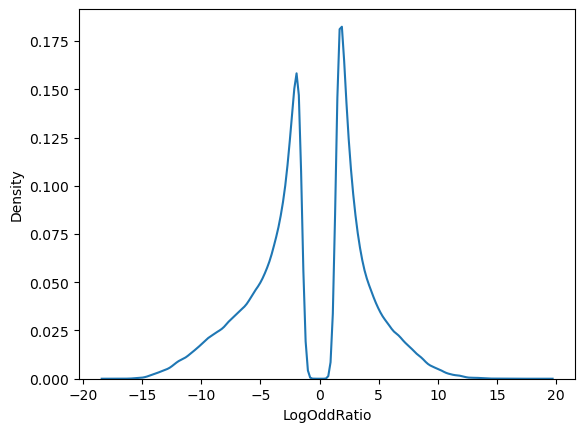

In [80]:
sns.kdeplot(df_interest['LogOddRatio'])
plt.show()


In [26]:
df_interest['reference_seq'].unique()

array(['GAGTGGAGCACTGTACATACCTGGCTGGATTGAGAATGGTAAGTAATTTGTAATAACATACCTGGCTTGTGCAAAAGCA',
       'AGATTTCACCTCTGCAAATATGAGAGATTCTGCAGAAGGTAAGCTTGTGATATTGGCTTGGTCTGAATTGGGTGTGTAT',
       'CTGGGTAATGCTGGTCACCAGCCTTGTGGCCCTTCAAGGTATGTCCAAAAGAGCCGTAAGCACCCCAAGCAATGAGGGT',
       'CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA',
       'TCTCTCAGTGGTCGCTATCTGGAGGAGCTTAGCCAAAGGTAAGCTTTATTATGAATTAGCACAGTCAGCTTCACACAGT',
       'TCTGACCAGTGCTGCTGTGACGAATCTTTCAGTTACAGGTAAGCAGCTGCCAGGCCATGCACCTGCTGAGCACATGGGA',
       'GCTGAAAAATATTATGGCAACAAATGCATTATTCCATGGTAAGATACGTCTCATTATTGGAGTGTGTCTGAACATATAT',
       'CAGTATCTGATTTCCACCCAGTCAAAAAAATTGTCCAGGTAAGCACAATATCCCTATTTATTTTCAGTCCTACCTCAAG',
       'TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT',
       'TCACATCCATCAGAGGATTGCTGATCACTCTTACCAAGGTATGTTTTATCACAGTGTTAAAAAGTACTGCTTATCATTT',
       'AACCAAATTTATATCTGCTTGGAACAACATGAAATATAGTAAGTATCATGTTTTAAAAATTGTATAAATCCAAAGAAAT',
       'AC

In [27]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide',  'reference_seq']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide     reference_seq                                                                  
rs1057516984  TT                              TTT                         TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT     7
rs10626387    T                               TCT                         AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs10668386    .                               TC                          AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs1158710364  TA                              TATA                        CTAACCATCATATTTAGAACCAGCTGTTTACCAGAGTGGTAAGTTGGATTGTGTTTTATTTTGGTTTTTATTCTTCATT     2
rs1172687424  G                               T                           CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA     5
rs1197477113  .                               

In [28]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide   
rs1057516984  TT                              TTT                            7
rs10626387    T                               TCT                           15
rs10668386    .                               TC                            15
rs1158710364  TA                              TATA                           2
rs1172687424  G                               T                              5
rs1197477113  .                               AG                             6
rs1202559184  .                               CG                             5
rs1209017757  .                               A                              1
rs1212185079  TATTAT                          TAT                            2
rs1230423427  AA                              AAA                            1
rs1289052837  .                               C                              9
rs1297116846  A                               AA          

-0.267426781822307 0.7891405811788812


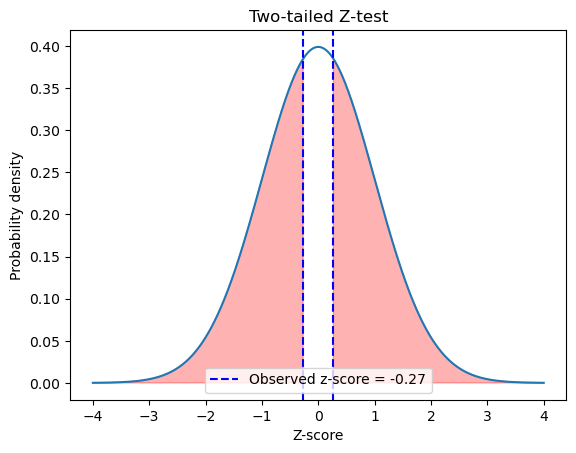

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Generate 1000 normally distributed data points
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Perform the z test
z_score, p_value = ztest(x1= s, value = mu)

print(z_score, p_value)

# # Generate data and plot the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)

# Shade the two-tail regions
plt.fill_between(x, 0, y, where=(x <= -abs(z_score)) | (x >= abs(z_score)), color='red', alpha=0.3)

# # Mark the observed value
plt.axvline(z_score, color='blue', linestyle='--', label=f'Observed z-score = {z_score:.2f}')
plt.axvline(-z_score, color='blue', linestyle='--')

plt.legend()
plt.title('Two-tailed Z-test')
plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.show()

0.0 1.0
1.959963984540054
-1.9201628731122704 1.8585445470122721


/tmp/ipykernel_237056/578947367.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/shared/software/anaconda/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




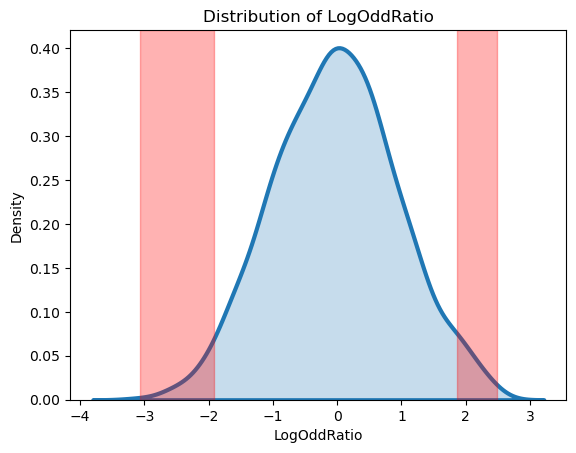

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Assume we have the following DataFrame
df = pd.DataFrame({
   'LogOddRatio': np.random.normal(0, 1, 1000)
})

# Perform the z test
z_score, p_value = ztest(x1= df['LogOddRatio'], value =  df['LogOddRatio'].mean())
print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'
sns.distplot(df['LogOddRatio'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3})

# Get the extreme values for a two tailed test at alpha = 0.05
z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


print(z_critical)
x1, x2 = df['LogOddRatio'].mean() + z_critical*df['LogOddRatio'].std(), df['LogOddRatio'].mean() - z_critical*df['LogOddRatio'].std()
print(x2, x1)
# Shade the area for the two tailed test
plt.axvspan(min(df['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df['LogOddRatio']), alpha=0.3, color='red')

plt.title('Distribution of LogOddRatio')
plt.show()
